![](https://raw.githubusercontent.com/cengineer13/modern_computer_vision/main/LOGO.png)

# **Vehicle and Pedestrian Detection**

####**In this lesson we'll learn:**

1. Use a Haarcascade classier to detect Pedestrians
2. Use our Haarcascade classifiers on videos
3. Use a Haarcascade classier to detect Vehicles or cars
4. Run above codes in Google Coolab


## **Video  reading**

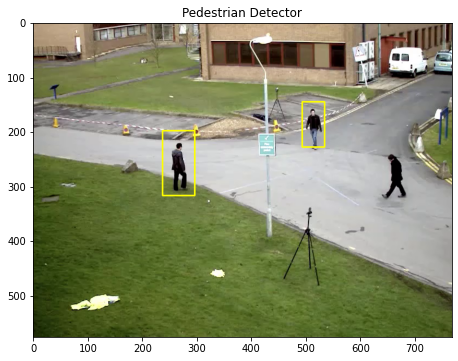

In [3]:
# Create our video capturing object
cap = cv2.VideoCapture('Datasets/videos/walking.mp4')

# Load our body classifier
body_classifier = cv2.CascadeClassifier('Datasets/Haarcascades/haarcascade_fullbody.xml')

# Read first frame
ret, frame = cap.read()

# Ret is True if successfully read
if ret: 

  #Grayscale our image for faster processing
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Pass frame to our body classifier
  bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
  
#Release our video capture
cap.release()   
imshow("Pedestrian Detector", frame)

# 2. **Pedestrians detection and writing  video file to disk**

**NOTE**: Takes around 1 minute to run.

We use cv2.VideoWriter to save the output as an AVI file.

```cv2.VideoWriter(video_output.avi, cv2.VideoWriter_fourcc('M','J','P','G'), FPS, (width, height))```

Formats can be:
- 'M','J','P','G' or MJPG
- MP4V
- X264
- avc1
- XVID



In [4]:
# Create our video capturing object
cap = cv2.VideoCapture('Datasets/videos/walking.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'walking_output.avi' file.
out = cv2.VideoWriter('Datasets/videos/walking_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

body_detector = cv2.CascadeClassifier('Datasets/Haarcascades/haarcascade_fullbody.xml')

# Loop once video is successfully loaded
while(True):
    ret, frame = cap.read()
    if ret: 

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        #Pass frame to our body classifier
        bodies = body_detector.detectMultiScale(gray, 1.2, 3)

        # Extract bounding boxes for any bodies identified
        for (x,y,w,h) in bodies:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

        # Write the frame into the file 'output.avi'
        out.write(frame)
    else:
        break

cap.release()
out.release()

# 3. **Vehicle or car detection and writing  video file to disk**

In [7]:
# Create our video capturing object
cap = cv2.VideoCapture('Datasets/videos/cars.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('Datasets/videos/cars_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

vehicle_detector = cv2.CascadeClassifier('Datasets/Haarcascades/haarcascade_car.xml')

# Loop once video is successfully loaded
while(True):

    ret, frame = cap.read()
    if ret: 

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Pass frame to our body classifier
        vehicles = vehicle_detector.detectMultiScale(gray, 1.2, 3)

        # Extract bounding boxes for any bodies identified
        for (x,y,w,h) in vehicles:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)

        # Write the frame into the file 'output.avi'
        out.write(frame)
    else:
        break

cap.release()
out.release()

# 4. Run above codes in Google Coolab

## **Play Video within Colab**
Steps
1. Convert the AVI file to MP4 using FFMPEG
2. Load the HTML plugins in IPython
3. Display our HTML video player

In [8]:
#pip install ffmpeg
!ffmpeg -i /content/walking_output.avi walking_output.mp4 -y #convert library

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('walking_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [ ]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
# Create our video capturing object
cap = cv2.VideoCapture('cars.mp4')

# Load our vehicle classifier
vehicle_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

# Read first frame
ret, frame = cap.read()

# Ret is True if successfully read
if ret: 

  #Grayscale our image for faster processing
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Pass frame to our body classifier
  vehicles = vehicle_detector.detectMultiScale(gray, 1.4, 2)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in vehicles:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
  
# Release our video capture
cap.release()   
imshow("Vehicle Detector", frame)